Nombre de la entrega : Actividad Semanal -- 6, visualización de dimensiones

Alumno : Francisco Javier Hernandez Camarillo,

Matricula: 00998083,

Materia: Ciencia y analitica de datos

Profesor: Dra. María de la Paz Rico Fernández.

Fecha: 27/OCT/2022

In [175]:
# Importar la librerias necesarias para la actividad
import pandas as pd
import numpy as np
import requests
import os
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns 


In [176]:
url='https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

data = pd.read_csv(url,index_col= 0)

In [177]:
# URL de la base de datos
url='https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

# Peticion de los datos
r=requests.get(url)

# Guardamos los datos en un archivo local con el mismo nombre
path=os.path.join(os.getcwd(),'default of credit card clients.csv')  # Obtenemos la direccion del archivo local para guardar la bd
with open(path,'wb') as f:                                                   # Crear archivo de datos
    f.write(r.content)                                                       # Escribir archivo de datos

# Lectura de los datos obtenios CSV
data = pd.read_csv(path, index_col=0)
print("Información de la base de datos: \n")
print(data.info())
print("\nVisualización de datos: \n")
print(data.head())

Información de la base de datos: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X2      29999 non-null  float64
 2   X3      29998 non-null  float64
 3   X4      29998 non-null  float64
 4   X5      29995 non-null  float64
 5   X6      29997 non-null  float64
 6   X7      29995 non-null  float64
 7   X8      29993 non-null  float64
 8   X9      29991 non-null  float64
 9   X10     29984 non-null  float64
 10  X11     29986 non-null  float64
 11  X12     29989 non-null  float64
 12  X13     29989 non-null  float64
 13  X14     29987 non-null  float64
 14  X15     29985 non-null  float64
 15  X16     29983 non-null  float64
 16  X17     29990 non-null  float64
 17  X18     29992 non-null  float64
 18  X19     29991 non-null  float64
 19  X20     29992 non-null  float64
 20  X21     29989 non-null  float64
 21  

In [178]:
# 2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()


print('data shape =\n %s'%str(data.shape))
print('data columns =\n %s'%str(data.columns))
print('data head() =\n %s'%str(data.head()))
print('data dtypes =\n %s'%str(data.dtypes))
print('data info() =\n %s'%str(data.info()))
print('data isna() =\n %s'%str(data.isna().sum()))








data shape =
 (30000, 24)
data columns =
 Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')
data head() =
         X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
ID                                                        ...            
1    20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2   120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3    90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4    50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5    50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   

        X16      X17     X18      X19      X20     X21     X22     X23    Y  
ID                                                                           
1       0.0      0.0     0.0    689.0      0.0     0.0     0.0     

In [179]:
# 3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

data.fillna(data.mean(),inplace= True)

print('data isna() =\n %s'%str(data.isna().sum()))

data isna() =
 X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64


In [180]:
data.Y.replace({"0.221189":"1"},inplace=True)

data['Y']

data['Y'].value_counts()


0.000000    23362
1.000000     6635
0.221189        3
Name: Y, dtype: int64

In [181]:
# 3. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,-0.266342,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,129747.661567,0.489117,0.790293,0.521950,9.217256,1.123773,1.197154,1.195908,1.168977,1.132994,...,64329.411150,60792.752471,59551.384923,16561.956313,2.304072e+04,17606.074601,15665.879011,15278.040231,17777.366677,0.415034
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2332.000000,1769.500000,1258.500000,1000.000000,8.360000e+02,390.000000,298.000000,254.750000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19066.000000,18123.000000,17100.500000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50177.000000,49198.250000,5007.000000,5.000000e+03,4512.000000,4016.500000,4043.750000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


la tendencia Central (mean) es la sumatoria de todos los campos de una columna entre el numero de campos de la misma columna (promedio)

La dispersion es la medida que nos sirve para evaluar la diferencia media que hay de los campos con respecto a la media general.



In [182]:
# 5. Realiza el conteo de las variables categóricas



para este caso se tomo las cariables catergoricas segun la descripcion de la base de datos que se encuentra en el siguiente link

https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/dataset_info.txt

Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

**X2: Gender (1 = male; 2 = female). **

**X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). **

**X4: Marital status (1 = married; 2 = single; 3 = others). **


X5: Age (year). 

**X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.** 


X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 


X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

variables categoricas 3. X2, X3 y X4


In [183]:
Variables_categoricas = data.loc[:,["X2","X3","X4"]]

Variables_categoricas_list = ["X2","X3","X4","X6","X7","X8","X9","X10","X11","Y"]

# Variables_categoricas_list = ["X2","X3","X4","X6","X7","X8","X9","X10","X11"]

data_nominals = data.drop(labels = Variables_categoricas_list,axis=1)

data_nominals

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
ID,,,,,,,,,,,,,,
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0


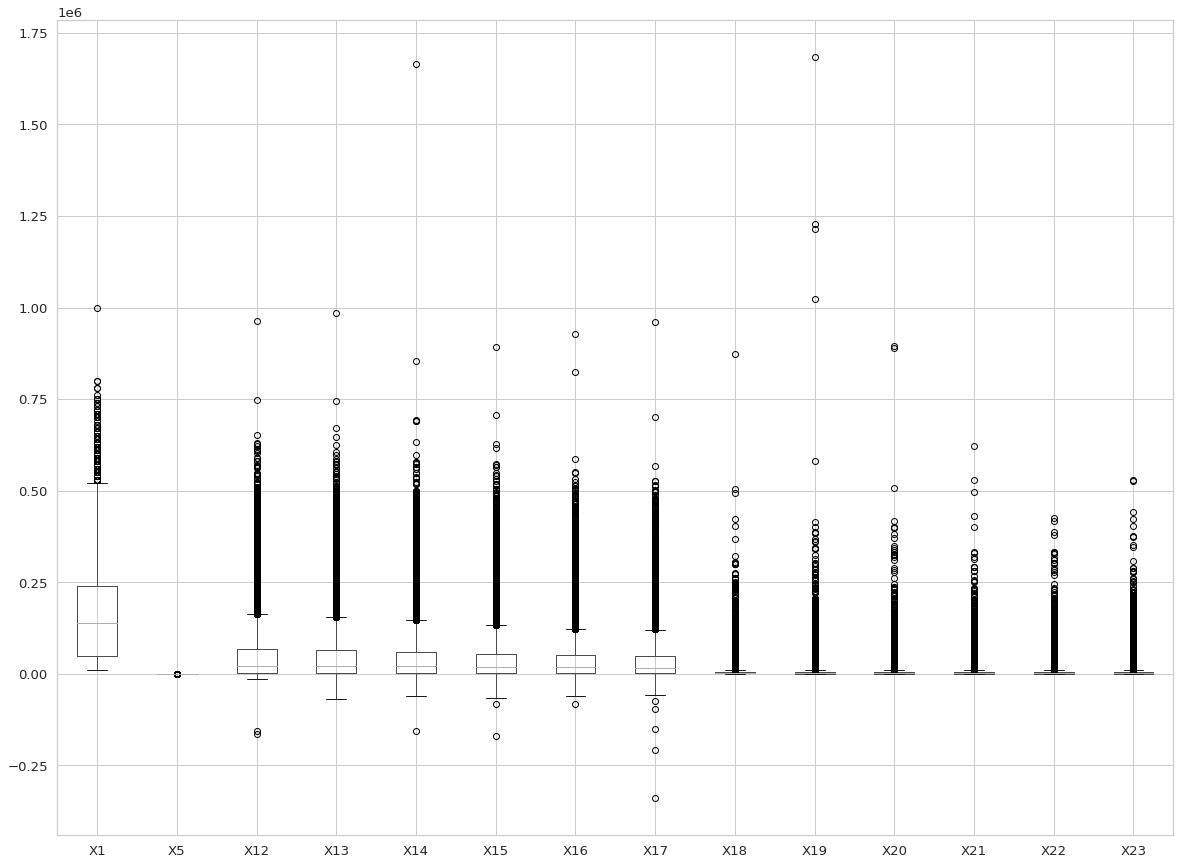

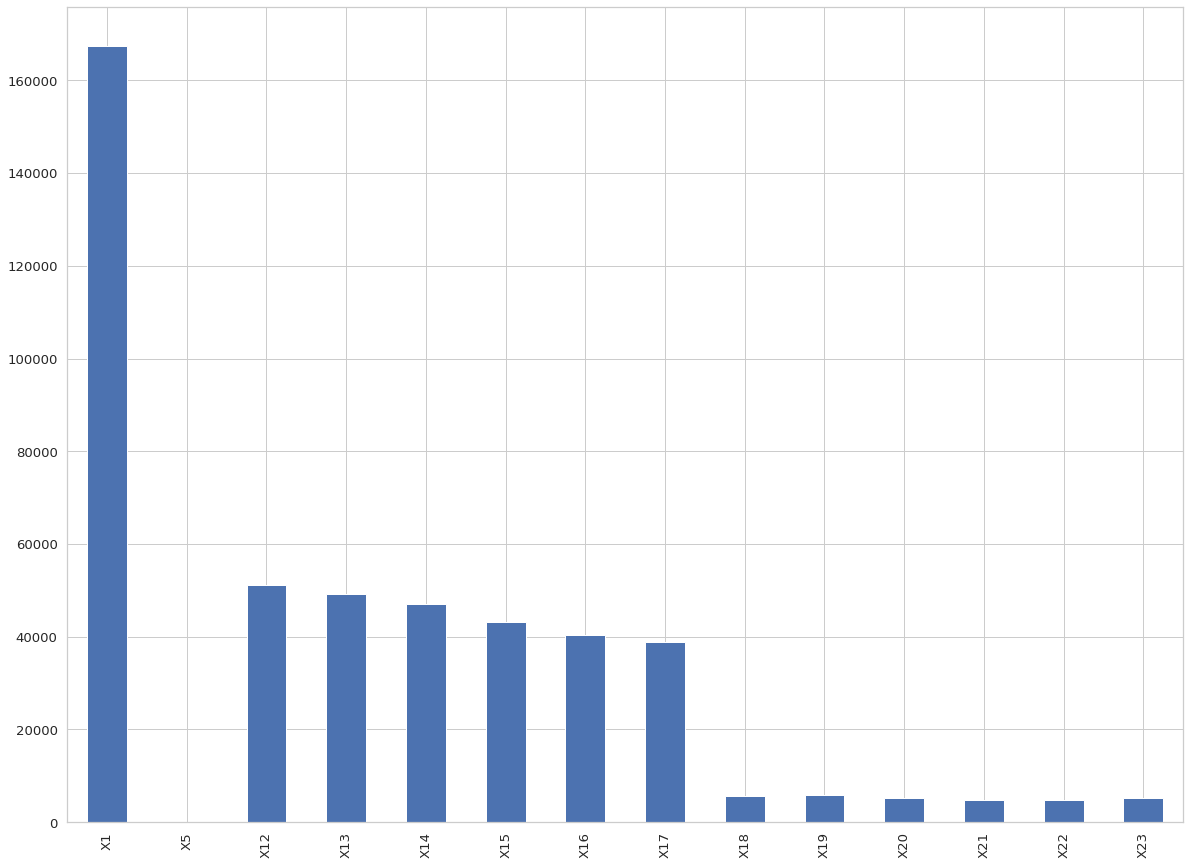

In [184]:
# 6. Escala los datos, si consideras necesario

fig1 = plt.figure(figsize =(20, 15))


 
# Creating axes instance
# ax = fig.add_axes([0, 0, 1, 1])

data_nominals.boxplot()

fig2 = plt.figure(figsize =(20, 15))

data_nominals.mean().plot.bar()

In [185]:
from sklearn import preprocessing

# scaler = preprocessing.StandardScaler() ## con este escaler me sale una muy baja media o numeros

#aqui hay que usar un pipeline para scalar solo las primeras 13 variables y no la ultima

scaler = preprocessing.MinMaxScaler()

data_escaled = scaler.fit_transform(data_nominals)

data2 = pd.DataFrame(data_escaled)

data2.describe()

data2



,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.212121,0.310345,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892
29996,0.141414,0.379310,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000
29997,0.020202,0.275862,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864
29998,0.070707,0.344828,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412


# 7. Reduce las dimensiones con PCA, si consideras necesario.

  Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

  Indica la importancia de las variables en cada componente

In [186]:
pcs = PCA()

pcs.fit_transform(scaler.fit_transform(data_nominals))

PCA2 = pcs.fit_transform(scaler.fit_transform(data_nominals))

pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_PCA = pcsSummary_df.copy()

pcsSummary_df = pcsSummary_df.transpose()

pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]

pcsSummary_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,0.165442,0.145278,0.109858,0.036786,0.033711,0.031934,0.024798,0.020991,0.018757,0.015610,0.011998,0.010435,0.008622,0.006168
Proportion of variance,0.414265,0.319439,0.182663,0.020482,0.017200,0.015434,0.009308,0.006669,0.005325,0.003688,0.002179,0.001648,0.001125,0.000576
Cumulative proportion,0.414265,0.733704,0.916368,0.936849,0.954049,0.969483,0.978791,0.985460,0.990784,0.994472,0.996651,0.998299,0.999424,1.000000


Analizando la varianza con 2 componentes alcanzamos + 70 % por lo que es el numero de componentes adecuados para nuestro ejercicio.

# 8. Elabora los histogramas de los atributos para visualizar su distribución

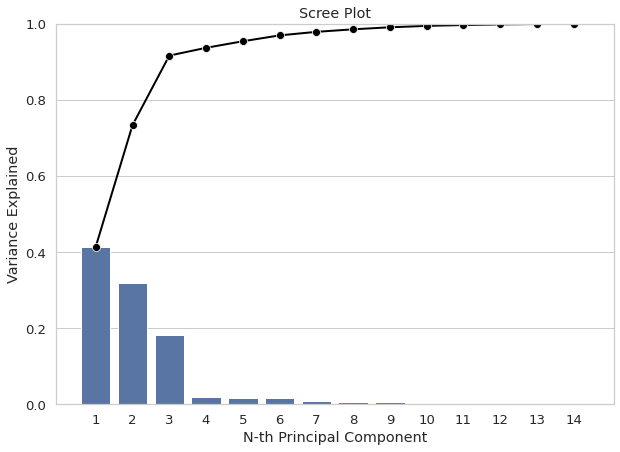

In [187]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

# 9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

In [188]:
df_2 = pd.DataFrame({'PCA1':PCA2[:,0],'PCA2':PCA2[:,1],'clase':data['Y']})
df_2['clase'].value_counts()

0.000000    23362
1.000000     6635
0.221189        3
Name: clase, dtype: int64

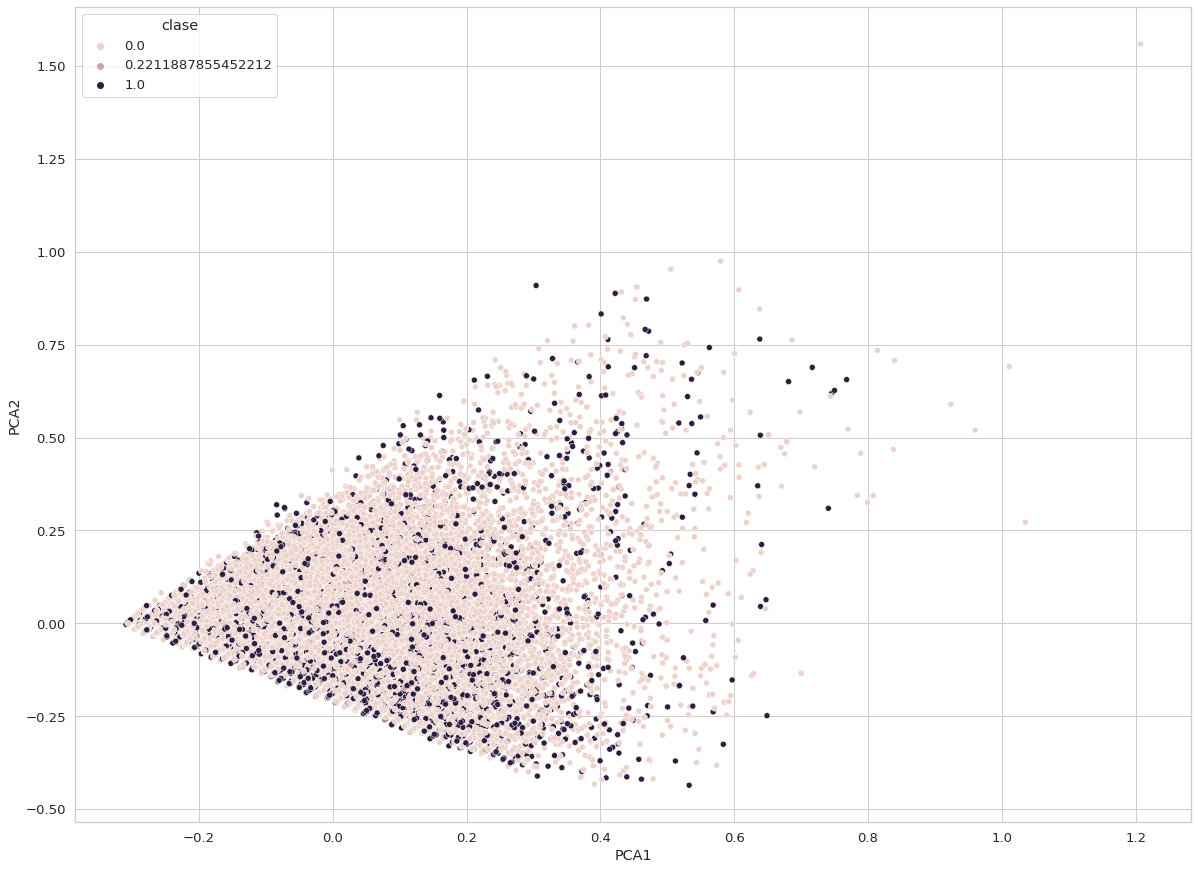

In [189]:
fig1 = plt.figure(figsize =(20, 15))

sns.scatterplot(x='PCA1',y='PCA2',hue='clase', data= df_2)



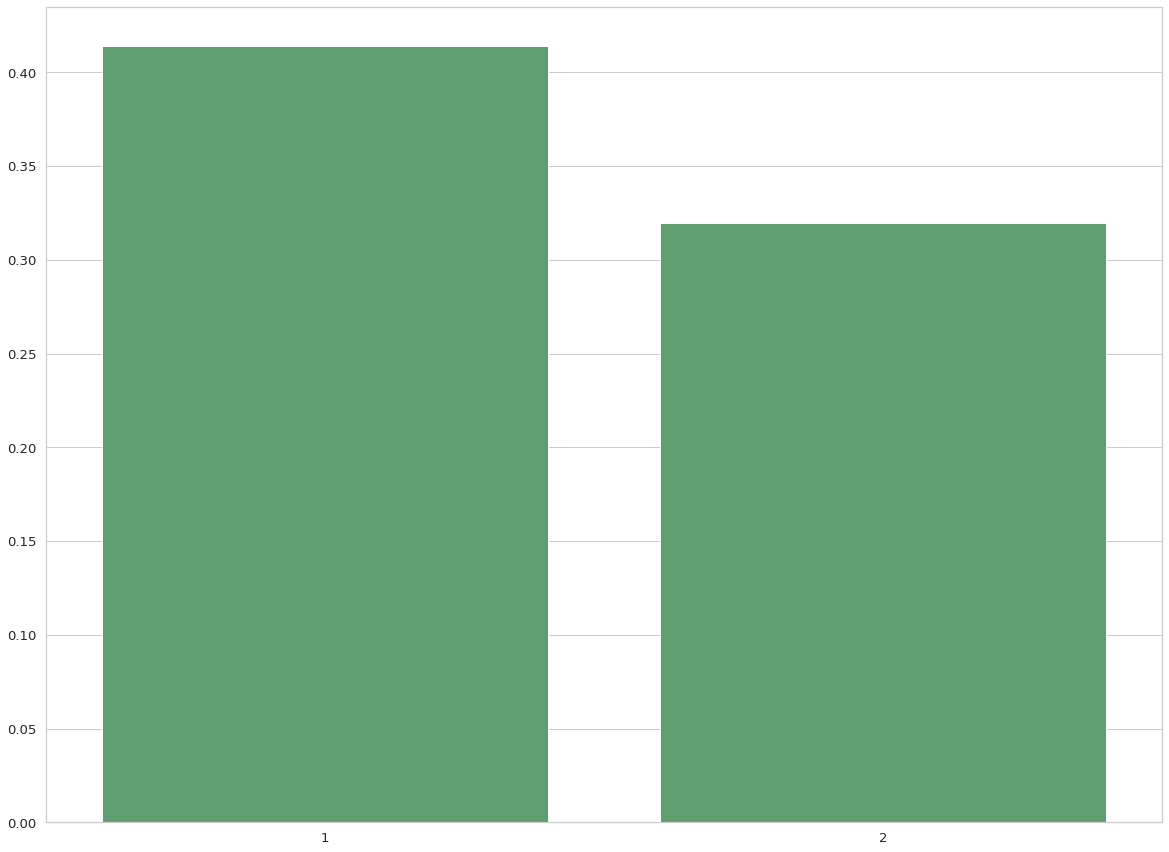

In [190]:
fig1 = plt.figure(figsize =(20, 15))

pcs = PCA(n_components=2)

pcs.fit_transform(scaler.fit_transform(data_nominals))

PC_components = np.arange(pcs.n_components_) + 1



# sns.barplot(x=['PCA1','PCA2'], y = df_2)

# sns.barplot(x='PCA1',y='PCA2',hue='clase', y= df_2)

sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'g'
                )

# 10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

Pienso que el Scatter plot es mas relevante en este caso , indica la distrubicion de ambos valores, habiendo una distrubucion de credito aprobado en los valores negativos .